# Project: Improving energy efficiency in a 5G network using machine learning.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML model">Machine learning modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

### Dataset Description:

>In this work, we present a 5G trace dataset collected from a major Irish mobile operator. The dataset is generated from two mobility patterns (static and car), and across two application patterns(video streaming and file download). The dataset is composed of client-side cellular key performance indicators (KPIs) comprised of channel-related metrics, context-related metrics, cell-related metrics and throughput information. These metrics are generated from a well-known non-rooted Android network monitoring application, G-NetTrack Pro. To the best of our knowledge, this is the first publicly available dataset that contains throughput, channel and context information for 5G networks.

### Data frame columns:

- Network mode: This influences the data speeds your device can achieve. 5G is 20 Gbps peak data rates and 100+ Mbps average data rates more than 4G.
- Speed: Speed at the time of measurement in km/h.
- Distance: distance from serving cell.
- DataConnection_Type: Mobile or WiFi. 
- RSRP: Reference Signal Received Power is a measurement of the received power level in a cell network. It represents an average power over cell-specific reference symbols carried inside distinct RE. RSRP is used for measuring cell signal strength/ coverage and therefore cell selection (dBm). The average power is a measurement of the power received from a single reference signal. -44dbm (good) to -140dbm (bad). The best value of RSRP is about -3dB and worst value can be -19.5dB. (To improve RSRP in LTE, use a signal booster. Cell phone boosters amplify your signal, increasing the signal strength RSRP).
- RSRQ: Reference Signal Received Quality indicates the quality of the received signal and its range is typically -19.5dB (bad) to -3dB (good). This represents a ratio between RSRP and RSSI. Signal strength (signal quality) is measured across all resource elements (RE), including interference from all sources (dB). (Reasons for poor RSRQ include Bad RSRP; Overshooting from neighbor cells; Less inter-sector separation of the same site; High utilization)
- SNR: Signal to Noise Ratio is the signal power to noise ratio in dB. A signal with an SNR value of 20dB or more is recommended for data networks, whereas an SNR value of 25dB or more is recommended for networks that use voice applications.
- CQI: Channel Quality Indicator is used by the mobile to indicate the channel quality to the eNB (Base station). The CQI reported value is between 0 and 15. This indicates the level of modulation and coding the user equipment (UE) could operate. In HSDPA, the CQI value ranges from 0 to 30. 30 indicates the best channel quality and 0.1 indicates the poorest channel quality.
- RSSI: Received Signal Strength Indicator is a measure of cellular signal strength. This represents a received power (wide-band) including a serving cell and interference and noise from other sources. From 0 (good) to -100 (bad). RSSI value of 55 is good. (Factors impacting RSSI include physical environment: physical obstacles to the radio wave propagation; physical environment: distance between transmitter and receiver; radio environment: interferences from other AP/clients on the network or neighbouring network)
- DL_bitrate: current downlink bit rate at the time of measurement.
- UL_bitrate: current uplink bit rate at the time of measurement.
- State: I (idle), V (voice), D (data).
- PINGAVE: average ping result from data sequence.
- PINGMIN: minimum ping result from data sequence.
- PINGMAX: maximum ping result from data sequence.
- PINGSTDEV: standard deviation for ping statistic from data sequence.
- PINGLOSS: ping loss in percents.
- CELLHEX: Cell in hex format.
- NODEHEX: Node in hex format.
- LACHEX: Location Area Code in hex format.
- RAWCELLID: cell id in raw form.
- NRxRSRP: RSRP values for the neighbouring cells.
- NRxRSRQ: RSRQ values for the neighbouring cells.
- RSRQ = N*RSRP/RSSI, where N = number of used resource blocks.




#### Problem Statement:
> Given rise in data rates, throughput and the need for energy saving, we intend to solve the problem of energy efficiency.

#### Research Aim:
>To improve the energy efficiency of a 5G network using Machine Learning.

#### Analysis Questions:
> 1. 
> 2. 


In [3]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import os
import re

## Data Wrangling

> Load the gathered data.

> Check for cleanliness(Assessing)

> Trim, Clean and restructure data to meet analysis Standard.

#### SPECIAL NOTATION:
>the dataset was first assembled using __Power Query__ in excel to aggregate STATIC DATASET and DRIVING DATASET in unique tables of two instead of programmatically doing it in python. This is to enhance scalability and code reusability.

### Load Dataset

In [2]:
complete_static = pd.read_excel('merged_driving.xlsx')
complete_driving = pd.read_excel('merged_static.xlsx')

> import the two tables containing both static and driving datasets to the workspace

### Assess Dataset

> import display library to enable us show two tables side by side

In [5]:
complete_static.head(3)


,Source.Name,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,B_2019.11.20_16.55.16.csv,2019.11.20_16.55.16,-8.499476,51.893446,0,B,3,LTE,-79,-12.0,...,-,-,-,-,3.0,76C6C,9CBA,124546051,-,-
1,B_2019.11.20_16.55.16.csv,2019.11.20_16.55.16,-8.499567,51.893413,0,B,3,LTE,-79,-12.0,...,-,-,-,-,3.0,76C6C,9CBA,124546051,-,-
2,B_2019.11.20_16.55.16.csv,2019.11.20_16.55.16,-8.499567,51.893413,0,B,3,LTE,-79,-12.0,...,-,-,-,-,3.0,76C6C,9CBA,124546051,-,-


In [6]:
complete_driving.head(3)

,Source.Name,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,B_2019.11.23_14.30.10.csv,2019.11.23_14.30.10,-8.394860,51.886241,0,B,11,5G,-97,-12.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-103.0,-14.0
1,B_2019.11.23_14.30.10.csv,2019.11.23_14.30.11,-8.394860,51.886241,0,B,11,5G,-94,-13.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-95.0,-204.0
2,B_2019.11.23_14.30.10.csv,2019.11.23_14.30.11,-8.392723,51.886788,0,B,11,5G,-94,-13.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-95.0,-204.0


> the two table columns absolutely matched from the view above, lets investigate further

In [7]:
complete_static.columns == complete_driving.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

>all columns matched!

In [8]:
complete_static.dtypes, complete_driving.dtypes

(Source.Name      object
 Timestamp        object
 Longitude       float64
 Latitude        float64
 Speed             int64
 Operatorname     object
 CellID            int64
 NetworkMode      object
 RSRP              int64
 RSRQ            float64
 SNR             float64
 CQI             float64
 RSSI             object
 DL_bitrate        int64
 UL_bitrate        int64
 State            object
 PINGAVG          object
 PINGMIN          object
 PINGMAX          object
 PINGSTDEV        object
 PINGLOSS         object
 CELLHEX         float64
 NODEHEX          object
 LACHEX           object
 RAWCELLID         int64
 NRxRSRP          object
 NRxRSRQ          object
 dtype: object,
 Source.Name      object
 Timestamp        object
 Longitude       float64
 Latitude        float64
 Speed             int64
 Operatorname     object
 CellID            int64
 NetworkMode      object
 RSRP              int64
 RSRQ            float64
 SNR             float64
 CQI             float64
 RSSI    

> CELLHEX column in __Static__ is a Float while in __Driving__ its an Object(string), we will know why in further analysis.

In [10]:
complete_static.describe()

,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,DL_bitrate,UL_bitrate,CELLHEX,RAWCELLID
count,103545.000000,103545.000000,103545.000000,103545.000000,103545.000000,100118.000000,88947.000000,88946.000000,103545.000000,103545.000000,3.197200e+04,1.035450e+05
mean,-8.439930,51.909667,31.546072,6399.275088,-84.693273,-10.590333,4.866831,10.783655,7900.793471,47.838862,9.635550e+06,2.866081e+07
std,0.040157,0.016857,17.949970,16700.071688,13.397452,4.322618,8.599885,3.260234,31795.022509,125.449211,8.612226e+08,3.225403e+07
min,-8.571555,51.872262,0.000000,0.000000,-200.000000,-26.000000,-30.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,-8.474538,51.896763,18.000000,3.000000,-95.000000,-13.000000,-1.000000,8.000000,0.000000,0.000000,2.000000e+00,1.080910e+07
50%,-8.447881,51.907823,32.000000,12.000000,-85.000000,-11.000000,4.000000,11.000000,11.000000,4.000000,2.000000e+00,1.101697e+07
75%,-8.397470,51.920281,44.000000,13.000000,-76.000000,-8.000000,10.000000,14.000000,2348.000000,48.000000,3.000000e+00,5.696461e+07
max,-8.353637,51.955647,105.000000,61187.000000,-48.000000,7.000000,35.000000,15.000000,532905.000000,6862.000000,7.700000e+10,1.245461e+08


In [11]:
complete_driving.describe()

,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,DL_bitrate,UL_bitrate,RAWCELLID,NRxRSRP,NRxRSRQ
count,85166.000000,85166.000000,85166.000000,85166.000000,85166.000000,84959.000000,82668.000000,82668.000000,85166.000000,85166.000000,8.516600e+04,69974.000000,6.997400e+04
mean,-8.414916,51.889407,0.728753,1952.816805,-96.199047,-12.539660,1.531971,11.305414,14232.341850,54.337717,1.186093e+07,-95.483708,3.590682e+06
std,0.037317,0.005854,4.596465,7304.518110,7.840226,2.924141,4.666230,2.514383,41725.210438,129.386769,5.733891e+06,12.012599,8.773930e+07
min,-8.483621,51.884203,0.000000,1.000000,-200.000000,-23.000000,-15.000000,0.000000,0.000000,0.000000,8.383580e+05,-205.000000,-2.250000e+02
25%,-8.394878,51.886123,0.000000,11.000000,-100.000000,-14.000000,-1.000000,10.000000,0.000000,0.000000,1.080500e+07,-103.000000,-1.600000e+01
50%,-8.394681,51.886183,0.000000,11.000000,-99.000000,-13.000000,2.000000,11.000000,2.000000,4.000000,1.080500e+07,-101.000000,-1.200000e+01
75%,-8.394601,51.886271,0.000000,11.000000,-93.000000,-11.000000,5.000000,14.000000,8867.000000,62.000000,1.111297e+07,-86.000000,-9.000000e+00
max,-8.353211,51.907512,91.000000,57099.000000,-52.000000,-2.000000,27.000000,15.000000,333070.000000,2418.000000,9.474765e+07,-51.000000,2.147484e+09


>A simple statitical display of the numerical values in the dataset shows a potential problem
in speed of driving dataset compared to the static dataset.

1. static has max speed of 105 with quartiles as 51, 51, 51
2. driving has max speed of 91 with quartiles as 0,0,0

In [29]:
display(complete_static.shape)
display(complete_driving.shape)

(103545, 27)

(85166, 27)

> 1. static data contains 103545 samples with 27 columns
> 2. driving data contains 85166 saplmes with 27 columns

lets investigate further

In [30]:
display(complete_static.info())
display(complete_driving.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103545 entries, 0 to 103544
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Source.Name   103545 non-null  object 
 1   Timestamp     103545 non-null  object 
 2   Longitude     103545 non-null  float64
 3   Latitude      103545 non-null  float64
 4   Speed         103545 non-null  int64  
 5   Operatorname  103545 non-null  object 
 6   CellID        103545 non-null  int64  
 7   NetworkMode   103545 non-null  object 
 8   RSRP          103545 non-null  int64  
 9   RSRQ          100118 non-null  float64
 10  SNR           88947 non-null   float64
 11  CQI           88946 non-null   float64
 12  RSSI          103545 non-null  object 
 13  DL_bitrate    103545 non-null  int64  
 14  UL_bitrate    103545 non-null  int64  
 15  State         103545 non-null  object 
 16  PINGAVG       103545 non-null  object 
 17  PINGMIN       103545 non-null  object 
 18  PING

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85166 entries, 0 to 85165
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Source.Name   85166 non-null  object 
 1   Timestamp     85166 non-null  object 
 2   Longitude     85166 non-null  float64
 3   Latitude      85166 non-null  float64
 4   Speed         85166 non-null  int64  
 5   Operatorname  85166 non-null  object 
 6   CellID        85166 non-null  int64  
 7   NetworkMode   85166 non-null  object 
 8   RSRP          85166 non-null  int64  
 9   RSRQ          84959 non-null  float64
 10  SNR           82668 non-null  float64
 11  CQI           82668 non-null  float64
 12  RSSI          85166 non-null  object 
 13  DL_bitrate    85166 non-null  int64  
 14  UL_bitrate    85166 non-null  int64  
 15  State         85166 non-null  object 
 16  PINGAVG       85166 non-null  object 
 17  PINGMIN       85166 non-null  object 
 18  PINGMAX       85166 non-nu

None

> SNR, CQI, RSRQ, CELLHEX columns in static dataset has missing values

> SNR, CQI, RSRQ, NRxRSRP, NRcRSRQ has missing values in driving data set

lets investigate further

In [31]:
complete_static.isnull().sum()
complete_driving.isnull().sum()

Source.Name         0
Timestamp           0
Longitude           0
Latitude            0
Speed               0
Operatorname        0
CellID              0
NetworkMode         0
RSRP                0
RSRQ             3427
SNR             14598
CQI             14599
RSSI                0
DL_bitrate          0
UL_bitrate          0
State               0
PINGAVG             0
PINGMIN             0
PINGMAX             0
PINGSTDEV           0
PINGLOSS            0
CELLHEX         71573
NODEHEX             0
LACHEX              0
RAWCELLID           0
NRxRSRP             0
NRxRSRQ             0
dtype: int64

Source.Name         0
Timestamp           0
Longitude           0
Latitude            0
Speed               0
Operatorname        0
CellID              0
NetworkMode         0
RSRP                0
RSRQ              207
SNR              2498
CQI              2498
RSSI                0
DL_bitrate          0
UL_bitrate          0
State               0
PINGAVG             0
PINGMIN             0
PINGMAX             0
PINGSTDEV           0
PINGLOSS            0
CELLHEX             0
NODEHEX             0
LACHEX              0
RAWCELLID           0
NRxRSRP         15192
NRxRSRQ         15192
dtype: int64

> Comfirmed, the missing values corresponds

In [32]:
complete_static.nunique()
complete_driving.nunique()

Source.Name        60
Timestamp       96782
Longitude        5742
Latitude         5433
Speed             105
Operatorname        3
CellID            184
NetworkMode         8
RSRP               76
RSRQ               31
SNR                55
CQI                16
RSSI               74
DL_bitrate      18555
UL_bitrate       1057
State               4
PINGAVG           180
PINGMIN           116
PINGMAX           224
PINGSTDEV         122
PINGLOSS            8
CELLHEX            36
NODEHEX            96
LACHEX              6
RAWCELLID         289
NRxRSRP           123
NRxRSRQ            56
dtype: int64

Source.Name        23
Timestamp       83961
Longitude          97
Latitude           96
Speed              46
Operatorname        3
CellID             19
NetworkMode         5
RSRP               61
RSRQ               18
SNR                43
CQI                16
RSSI               57
DL_bitrate      21412
UL_bitrate       1106
State               4
PINGAVG            72
PINGMIN            50
PINGMAX            93
PINGSTDEV          57
PINGLOSS            7
CELLHEX            19
NODEHEX            13
LACHEX              4
RAWCELLID          25
NRxRSRP            61
NRxRSRQ            43
dtype: int64

> 8 different Network modes in static and 5 in Driving

Lets drill into individual columns

In [24]:
# function to get unique values
def unique_value(column):
 
    unique = []
     
    for value in column:
        if value not in unique:
            unique.append(value)

    for value in unique:
        print(value)

In [34]:
display(unique_value(complete_static.NetworkMode))

display(unique_value(complete_driving.NetworkMode))

LTE
UMTS
HSPA+
5G
HSUPA
HSDPA
EDGE
GPRS


None

5G
LTE
UMTS
HSPA+
HSUPA


None

>Both static and Driving Datasets has other network types order than 5G network

>Our Research is 5G network focused. we need to filter out ones with 5G network type only

In [35]:
complete_static['CELLHEX'].unique()

array([3.000e+00, 1.000e+00, 1.101e+03,       nan, 2.000e+00, 4.000e+00,
       9.000e+00, 1.300e+01, 1.000e+02, 7.700e+10, 7.919e+03, 5.209e+03,
       2.900e+01, 2.100e+01, 2.821e+03, 7.100e+01, 6.910e+02, 8.700e+01,
       6.500e+01, 1.165e+03, 1.900e+01, 5.019e+03, 8.000e+00, 2.908e+03,
       3.800e+01, 7.728e+03, 5.018e+03, 0.000e+00, 6.100e+01, 1.010e+02,
       8.508e+03, 9.136e+03, 7.900e+01, 5.000e+00, 7.641e+03, 7.700e+05,
       2.909e+03])

In [36]:
complete_driving['CELLHEX'].unique()

array(['B', '49', '9', 'CB49', 'CAD6', '77EF', '9EFF', '2', '1', '3', 'D',
       'C', '920D', '29B1', 'DF0B', 'DE46', 'A029', '5209', '7919'],
      dtype=object)

>there is a data integrity and structure problem here due to inconsistency in data types and values in both datasets

We shall address this

In [37]:
complete_driving['NetworkMode'].value_counts(),
complete_static['NetworkMode'].value_counts()

5G       78148
LTE       4520
HSPA+     2430
HSUPA       38
UMTS        30
Name: NetworkMode, dtype: int64

5G       58255
LTE      30692
HSPA+    13450
UMTS       462
HSUPA      432
HSDPA      163
GPRS        78
EDGE        13
Name: NetworkMode, dtype: int64

> 5G network type counts dominates in all datasets which is very good for our research work as it affords us enough data set after filtering.

In [38]:
complete_driving['NetworkMode'].duplicated().sum(),
complete_static['NetworkMode'].duplicated().sum()

85161

103537

> Lots of duplicate values, we will drop them but not yet.

### Data Cleaning

>Begins with filtering for 5G network along the NetworkMode column

>Then the rest of the observations as Discovered in the ASSESS section follows

In [39]:
driving_5G = complete_driving.loc[complete_driving['NetworkMode'] == '5G']
static_5G = complete_static.loc[complete_static['NetworkMode'] == '5G']

> data filtered for 5G network mode type to comply with our research objective!!!

In [40]:
driving_5G.to_csv('5Gdrive.csv', index=False)
static_5G.to_csv('5Gstatic.csv', index=False)

>Save in CSV(comma separated file), for easy importation and lesser code runtime

In [3]:
driving = pd.read_csv('5Gdrive.csv')
static = pd.read_csv('5Gstatic.csv')

C:\Users\Ngwu Nneamaka\AppData\Local\Temp\ipykernel_8104\2408494109.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  driving = pd.read_csv('5Gdrive.csv')


> Load the dataset again so the cleaning continues

In [4]:
driving.drop(['Source.Name', 'Timestamp'], inplace=True, axis=1)
static.drop(['Source.Name', 'Timestamp'], inplace=True, axis=1)

>drop columns not relevant to our studies

In [12]:
driving['CELLHEX'].unique(), static['CELLHEX'].unique()

(array(['B', 'D', 'C'], dtype=object), array([nan]))

> Data inconsistency as discovered in the ASSESS section was automatically fixed when we filtered and converted to CSV

In [13]:
static.replace(to_replace = ['-', np.nan], value = [None, None], inplace = True)
driving.replace(to_replace = ['-', np.nan], value = [None, None], inplace = True)

> replace some unknown characters and missing values with None which is boolean that python and our future models can understand 

In [14]:
driving['RSRQ'].fillna(driving['RSRQ'].mean(), inplace=True)
driving['NRxRSRP'].fillna(driving['NRxRSRP'].mean(), inplace=True)
driving['NRxRSRQ'].fillna(driving['NRxRSRQ'].mean(), inplace=True)

>manually fill the null values in some numeric columns with the mean

In [15]:
static['NRxRSRQ'] = pd.to_numeric(static['NRxRSRQ'], errors='coerce')
static['NRxRSRP'] = pd.to_numeric(static['NRxRSRP'], errors='coerce')

> convert using coerce method the values to numeric values so the null values can be filled

In [16]:
static['NRxRSRQ'].fillna(static['NRxRSRQ'].mean(), inplace=True)
static['NRxRSRP'].fillna(static['NRxRSRP'].mean(), inplace=True)
static['RSRQ'].fillna(static['RSRQ'].mean(), inplace=True)

In [17]:
display(static.isnull().sum()/static.shape[0])
display(driving.isnull().sum()/driving.shape[0])

Longitude       0.000000
Latitude        0.000000
Speed           0.000000
Operatorname    0.000000
CellID          0.000000
NetworkMode     0.000000
RSRP            0.000000
RSRQ            0.000000
SNR             0.000000
CQI             0.000017
RSSI            0.086001
DL_bitrate      0.000000
UL_bitrate      0.000000
State           0.000000
PINGAVG         0.982113
PINGMIN         0.982113
PINGMAX         0.982113
PINGSTDEV       0.982113
PINGLOSS        0.982010
CELLHEX         1.000000
NODEHEX         0.000000
LACHEX          0.000000
RAWCELLID       0.000000
NRxRSRP         0.000000
NRxRSRQ         0.000000
dtype: float64

Longitude       0.000000
Latitude        0.000000
Speed           0.000000
Operatorname    0.000000
CellID          0.000000
NetworkMode     0.000000
RSRP            0.000000
RSRQ            0.000000
SNR             0.000000
CQI             0.000000
RSSI            0.332101
DL_bitrate      0.000000
UL_bitrate      0.000000
State           0.000000
PINGAVG         0.984363
PINGMIN         0.984363
PINGMAX         0.984363
PINGSTDEV       0.984363
PINGLOSS        0.984158
CELLHEX         0.000000
NODEHEX         0.000000
LACHEX          0.000000
RAWCELLID       0.000000
NRxRSRP         0.000000
NRxRSRQ         0.000000
dtype: float64

> 1. great discovery!! it makes more sense in dropping some of the columns with missing values as many of them has 98% of its values missing. 2% is worthless to what we want to do

> 2. CELLHEX column in static dataset even has 100% dataset missing, it makes sense to drop it in both datasets to eliminate biased analysis. 

In [18]:
driving.drop(['PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV', 'PINGLOSS', 'CELLHEX'], inplace=True, axis=1)
static.drop(['PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV', 'PINGLOSS', 'CELLHEX'], inplace=True, axis=1)

> columns with 98% and above missing values dropped

In [19]:
static.drop_duplicates(inplace=True)
driving.drop_duplicates(inplace=True)

> Drop duplicated values from the dataset. this are values that are exactly the same thing across every row and columns

In [20]:
static.shape

(53636, 19)

>the final analysis dataset contains 53636 rows and 19 colums for Static dataset

In [21]:
driving.shape

(63186, 19)

> the final analysis dataset contains 63186 rows and 19 colums for Static dataset

In [22]:
static.isnull().sum(),
driving.isnull().sum()

Longitude           0
Latitude            0
Speed               0
Operatorname        0
CellID              0
NetworkMode         0
RSRP                0
RSRQ                0
SNR                 0
CQI                 0
RSSI            18980
DL_bitrate          0
UL_bitrate          0
State               0
NODEHEX             0
LACHEX              0
RAWCELLID           0
NRxRSRP             0
NRxRSRQ             0
dtype: int64

>RSSI column in both datasets still contains missing values

lets investigate further

In [25]:
unique_value(static.RSSI),
unique_value(driving.RSSI)

None
-80
-82
-78
-81
-83
-84
-86
-77
-76
-79
-85
-87
-89
-88
-90
-93
-91
-73
-74
-65
-67
-70
-94
-66
-75
-71
-61
-64
-59
-57
-54
-52
-55
-60
-53
-50
-63
-62
-69
-56
-58
-68
-49
-51
-48
-47
-44
-45
-39
-41
-42
-46
-72
-92
-43
-36
-37
-40
-34
-38
-35
-33
-105
-103
-107
-109
-111
-99
-101
-97
-95
-113
None
-76
-75
-77
-79
-78
-80
-83
-81
-84
-86
-82
-90
-88
-91
-92
-85
-87
-68
-73
-74
-71
-69
-72
-70
-67
-64
-60
-58
-55
-63
-66
-61
-65
-59
-51
-57
-62
-49
-50
-53
-56
-47
-42
-44
-41
-89
-93
-94
-107
-105
-103
-101
-99
-101
-99
-103
-105
-107
-109
-111
-97


> RSSI seems like it will be better fit if converted to numeric as it will help in filling the missing value with the mean.

In [26]:
static['RSSI'] = pd.to_numeric(static['RSSI'], errors='coerce')
driving['RSSI'] = pd.to_numeric(driving['RSSI'], errors='coerce')

>RSSI column converted to numeric value

lets check

In [27]:
display(static.RSSI.dtypes)
display(static.RSSI.dtypes)

dtype('float64')

dtype('float64')

> Yes, both are now numeric values, lets fill missing values with the mean

In [28]:
static['RSSI'].fillna(static['RSSI'].mean(), inplace=True)
driving['RSSI'].fillna(driving['RSSI'].mean(), inplace=True)

> missing values filled for RSSI column, Lets check again

In [29]:
display(static['RSSI'].isnull().sum())
display(static['RSSI'].isnull().sum())

0

0

>No more missing values!!!

In [59]:
static.to_csv('Exploratory_static_5G_data.csv')
driving.to_csv('Eploratory_driving_5G_data.csv')

>store our clean data

# our exploratory data analysis can come in now!!!!

In [4]:
explore_static = pd.read_csv('Exploratory_static_5G_data.csv')
explore_driving = pd.read_csv('Eploratory_driving_5G_data.csv')

> import the new datasets ready for EDA

In [5]:
#join the both datasets to ensure uniform preprocessing
static = explore_static.shape[0]
drive = explore_driving.shape[0]
all_datasets = pd.concat([explore_static, explore_driving], ignore_index = False)
print("all_data size is : {}".format(all_datasets.shape))

all_data size is : (116822, 20)


> join the two datasets for uniformed preprocessing and Analysis

In [6]:
all_datasets.rename(columns = {'RSSI':'rec_sig_strght', 'CQI':'sig_qual_indicator', 'SNR':'sig_noise_ratio',
                              'RSRQ':'ref_sig_qual', 'RSRP':'ref_sig_power'}, inplace = True)

> make the column names more descriptive

In [7]:
all_datasets.columns = [x.lower() for x in all_datasets.columns]

> reduce all column names to lowercase

In [8]:
all_datasets.drop(['unnamed: 0', 'operatorname', 'rawcellid', 'cellid', 'networkmode', 'longitude', 'latitude'], axis = 1, inplace = True)

> drop the index turned column and operatorname, they are not important to our analysis

In [89]:
all_datasets.to_csv('exploratory_and_model_fit_dataset')

> save model-fit dataset version

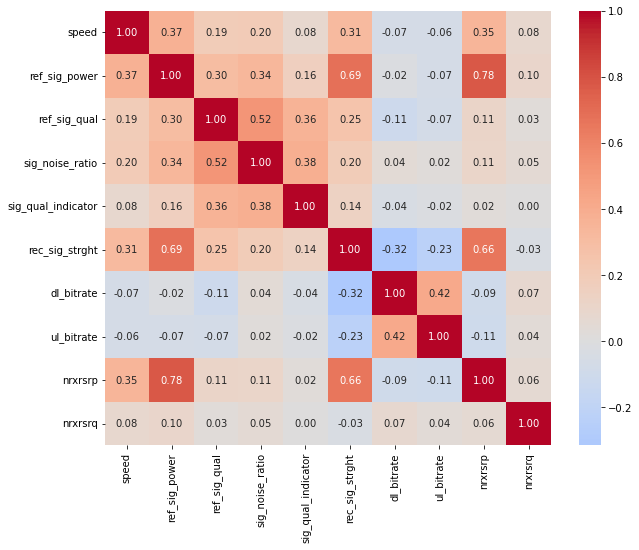

In [9]:
#Plot a heatmap to show the correlation between the numeric variables, and use a diverging palette.
fig, ax = plt.subplots(figsize=(10,8))    # Sample figsize in inches
sns.heatmap(all_datasets.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', center = 0);

> lots of interesting correlations here!!
- 0.37 between speed and Reference signal recieved power
- 0.30 between ref_sig_power and ref_signal_quality(target variable)
- 0.34 between ref_sig_power and sig_noise_ratio.
- 0.69 between ref_sig_power and ref_signal_strenght.
- 0.30 between ref_sig_power and ref_signal_quality
- 0.78 between ref_sig_power and rnxsrq
- 0.52 between ref_sig_qal(target variable) and sig_noise_ratio
- 0.36 between ref_sig_qal(target variable) and sig_quality_indicator
- 0.25 between ref_sig_qal(target variable) and rec_sig_strght

In [10]:
numeric_columns = ['speed', 'ref_sig_power', 'ref_sig_qual', 'sig_noise_ratio', 'sig_qual_indicator', 'rec_sig_strght', 
          'dl_bitrate', 'ul_bitrate', 'nrxrsrp', 'nrxrsrq']

> numerical columns to study its distribution, and then take further step to normalise it in fututure data preprocessing.

In [11]:
all_datasets[all_datasets[numeric_columns] == 'D'].value_counts()

Series([], dtype: int64)

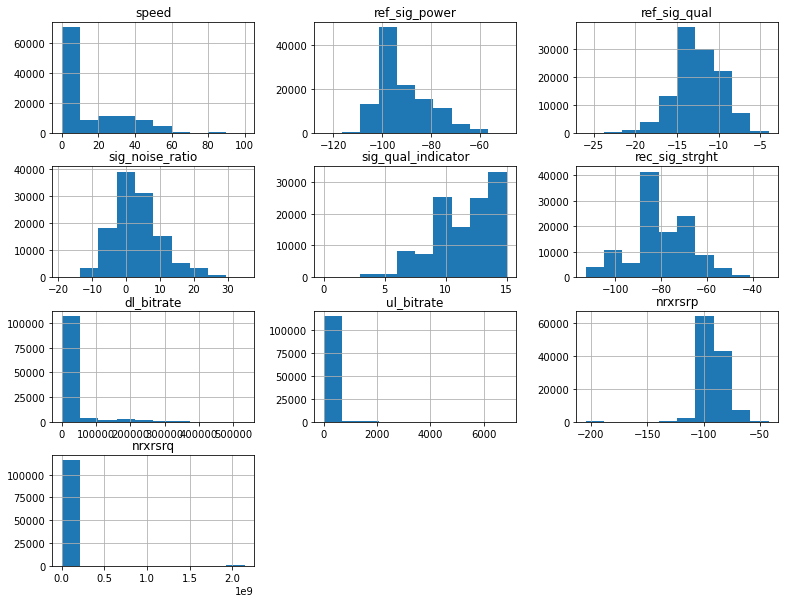

In [12]:
all_datasets.hist(figsize=(13,10));

- speed is skewed to the right. Needs normalisation
- sig_noise_ratio is almost a gussian distribution, needs little normalisation
- dl_biltrate needs further investigation of its values as its centerd between o and 1
- rnxrsrq needs further investigation as well due its values centered between 0 and o.3
- ref_sig_power is skewed to the right and needs normalisation
- sig_qual_indicator is heavily skewed to the left, needs normalisation
- ul_biltrate needs further investigation as well due its values centered between 0 and 1000
- re_sig_qual(target variable) has e good distribution, tho we are never gonna touch it if it does not.
- ref_sig_strght is almost perfect but we will still normalise for a perfect guassian distribution.
- rnxrp is not a standard distribution due to narrow value ranges, will be touched tho

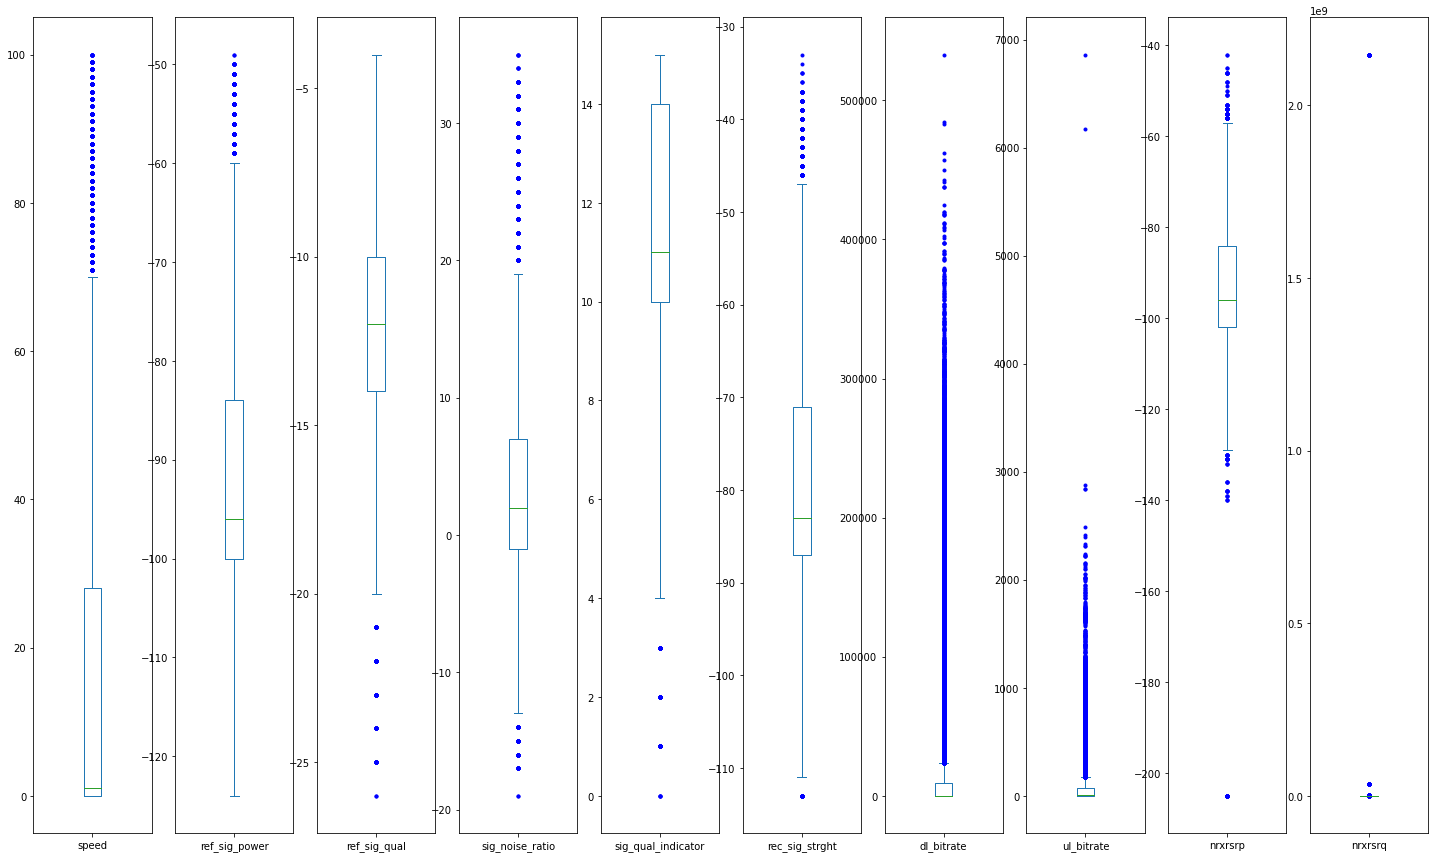

In [13]:
all_datasets[numeric_columns].plot(kind = 'box', subplots=True, sym='b.', figsize=(25,15));

- Lots of outliers on the speed column
- many of them exists in ref_sig_power colum
- few of them in ref_sig_power
- signal_noise_ratio has many many outliers
- sig_qual_indicator has them too, but not many of them
- rec_sig_strenght has many of them too
- dl_biltrate has tons of outliers
- bl_biltrate has many outliers
- rnxrsp has few outliers

> All these outliers needs to be removed before any ML model building

In [14]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['state', 'nodehex', 'lachex']

# process columns, apply LabelEncoder to categorical features
for c in cat_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_datasets[c].values)) 
    all_datasets[c] = lbl.transform(list(all_datasets[c].values))

> Encode the categorical variables for our model to properly use them.

In [15]:
# (modified from http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text


def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out


def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

In [16]:
print(f"speed has {count_outliers(all_datasets, 'speed')} outliers")
print(f"ref_sig_power has {count_outliers(all_datasets, 'ref_sig_power')} outliers")
print(f"ref_sig_qual has {count_outliers(all_datasets, 'ref_sig_qual')} outliers")
print(f"sig_noise_ratio has {count_outliers(all_datasets, 'sig_noise_ratio')} outliers")
print(f"sig_qual_indicator has {count_outliers(all_datasets, 'sig_qual_indicator')} outliers")
print(f"sig_qual_indicator has {count_outliers(all_datasets, 'sig_qual_indicator')} outliers")
print(f"rec_sig_strght has {count_outliers(all_datasets, 'rec_sig_strght')} outliers")
print(f"dl_bitrate has {count_outliers(all_datasets, 'dl_bitrate')} outliers")
print(f"ul_bitrate has {count_outliers(all_datasets, 'ul_bitrate')} outliers")
print(f"nrxrsrp has {count_outliers(all_datasets, 'nrxrsrp')} outliers")
print(f"nrxrsrq has {count_outliers(all_datasets, 'nrxrsrq')} outliers")

speed has 1350 outliers
ref_sig_power has 808 outliers
ref_sig_qual has 1553 outliers
sig_noise_ratio has 4929 outliers
sig_qual_indicator has 1211 outliers
sig_qual_indicator has 1211 outliers
rec_sig_strght has 1133 outliers
dl_bitrate has 13715 outliers
ul_bitrate has 12904 outliers
nrxrsrp has 358 outliers
nrxrsrq has 14975 outliers


In [ ]:
df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]

In [17]:
# %% Remove the outliers excluding the one in Ref_sig_quality
print(f"rows before removing: {all_datasets.shape[0]}")
all_datasets = remove_outliers(all_datasets, 'speed')
all_datasets = remove_outliers(all_datasets, 'ref_sig_power')
all_datasets = remove_outliers(all_datasets, 'sig_noise_ratio')
all_datasets = remove_outliers(all_datasets, 'sig_qual_indicator')
all_datasets = remove_outliers(all_datasets, 'sig_qual_indicator')
all_datasets = remove_outliers(all_datasets, 'rec_sig_strght')
all_datasets = remove_outliers(all_datasets, 'dl_bitrate')
all_datasets = remove_outliers(all_datasets, 'ul_bitrate')
all_datasets = remove_outliers(all_datasets, 'nrxrsrp')
all_datasets = remove_outliers(all_datasets, 'nrxrsrp')
print(f"rows after removing: {all_datasets.shape[0]}")

rows before removing: 116822
rows after removing: 85173


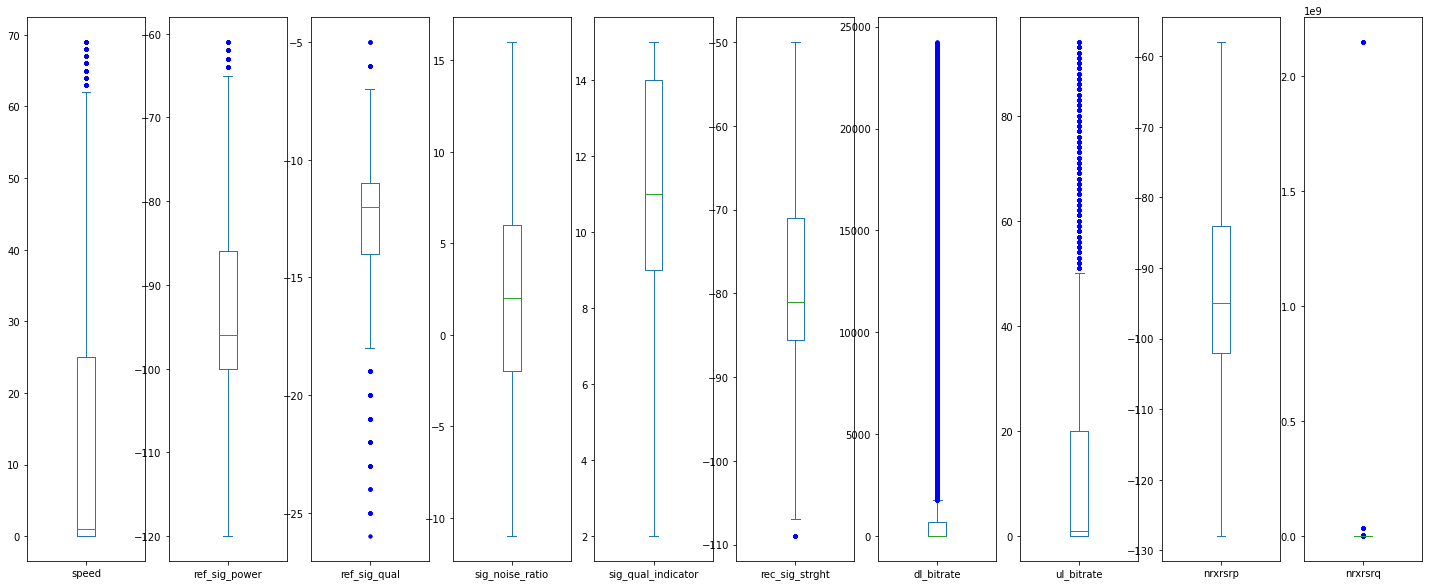

In [18]:
all_datasets[numeric_columns].plot(kind = 'box', subplots=True, sym='b.', figsize=(25,10));

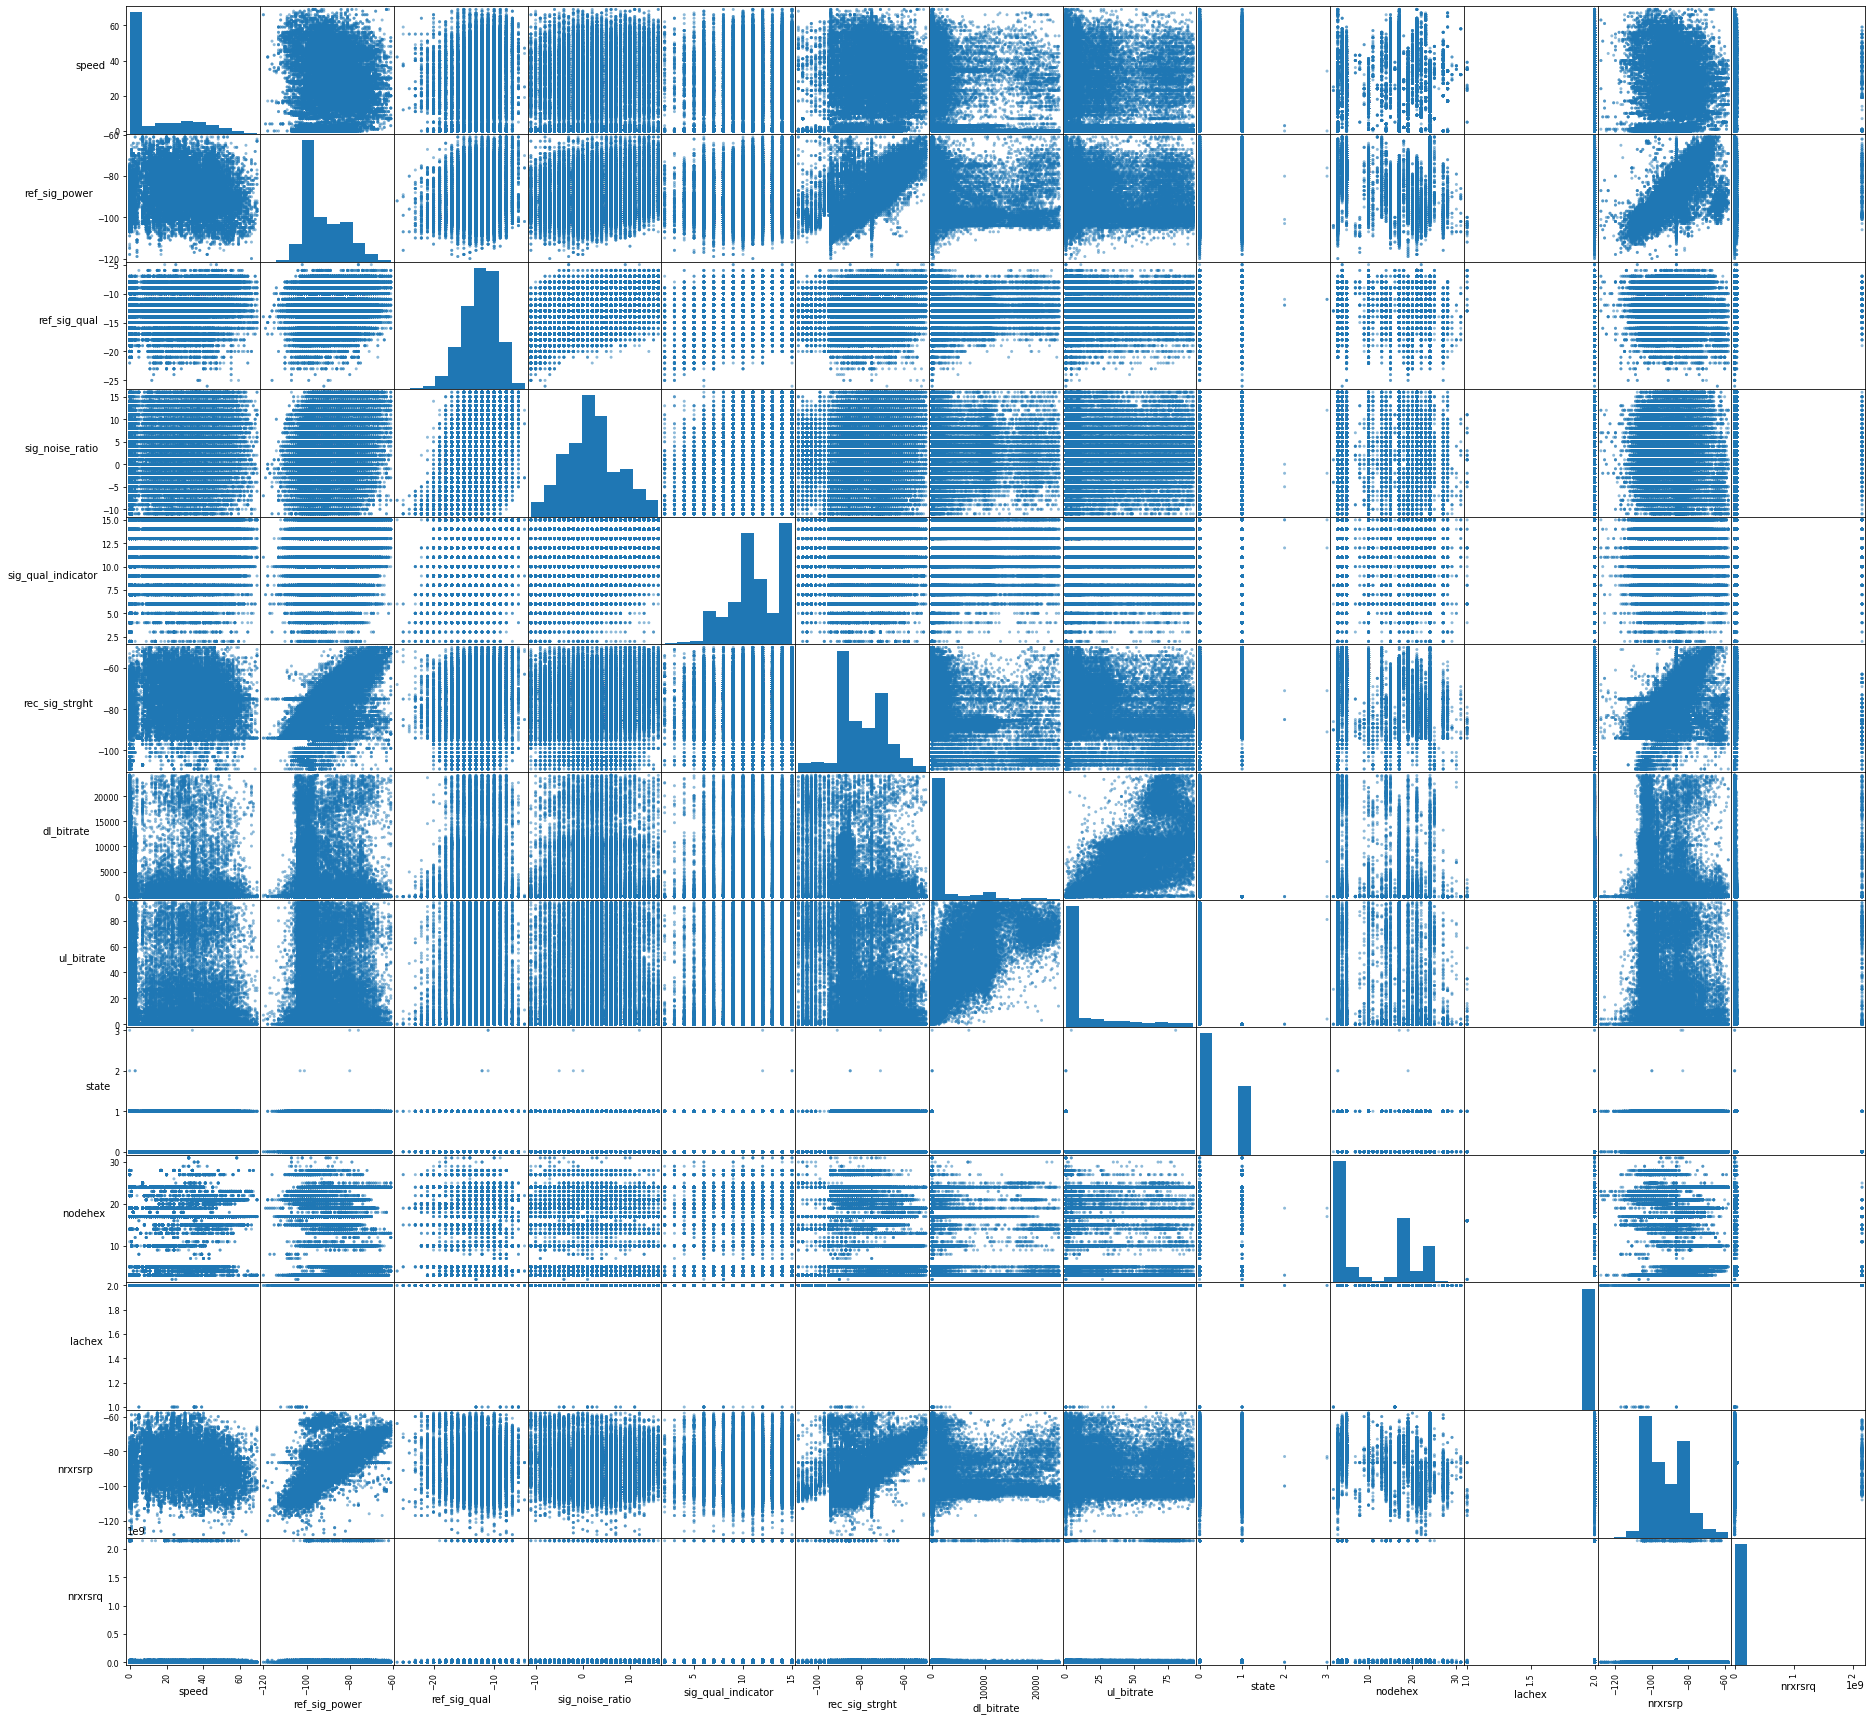

In [19]:
# Let's improve this plot
axes = pd.plotting.scatter_matrix(all_datasets, figsize=(26,24))
for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show();

>The Scattermatrix shows some strong relationships between variables that we can go further to pick out one by one

In [21]:
all_datasets.columns

Index(['speed', 'ref_sig_power', 'ref_sig_qual', 'sig_noise_ratio',
       'sig_qual_indicator', 'rec_sig_strght', 'dl_bitrate', 'ul_bitrate',
       'state', 'nodehex', 'lachex', 'nrxrsrp', 'nrxrsrq'],
      dtype='object')

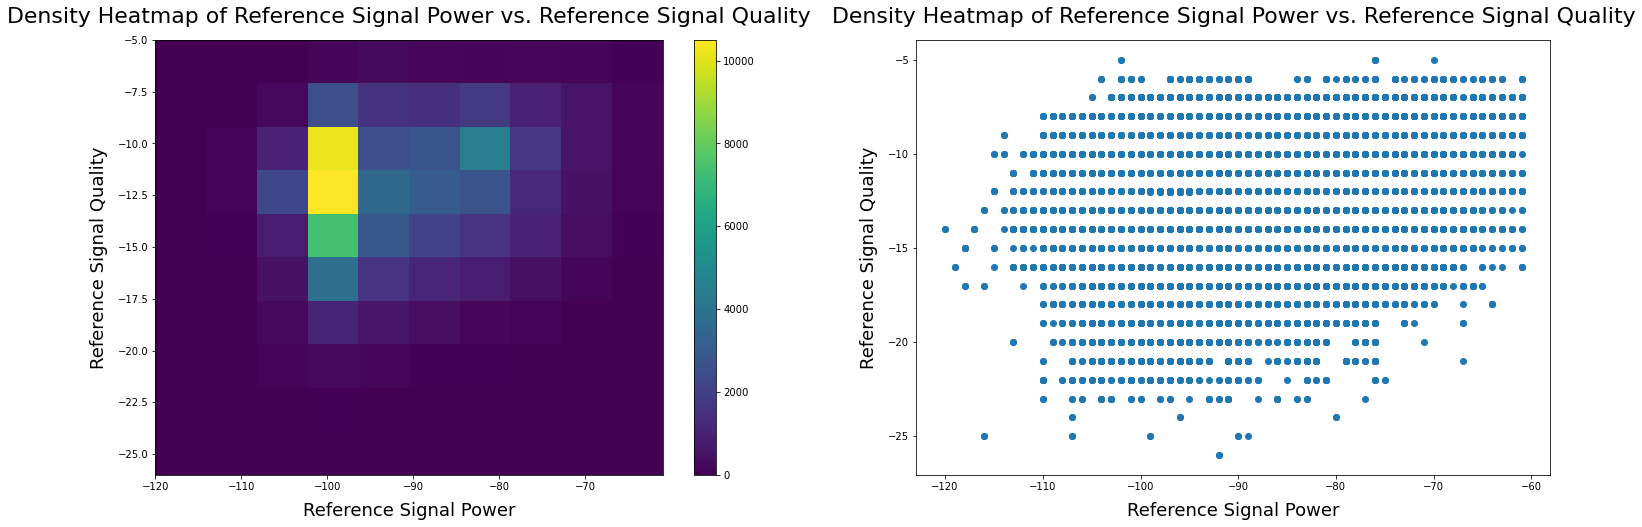

In [33]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_power' , y = 'ref_sig_qual')
plt.title('Density Heatmap of Reference Signal Power vs. Reference Signal Quality', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Power', labelpad=10, fontsize=18)
plt.ylabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
#sample_df = bike_df.sample(n=100000)
plt.scatter(data = all_datasets, x ='ref_sig_power' , y = 'ref_sig_qual')
plt.title('Density Heatmap of Reference Signal Power vs. Reference Signal Quality', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Power', labelpad=10, fontsize=18)
plt.ylabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.show();

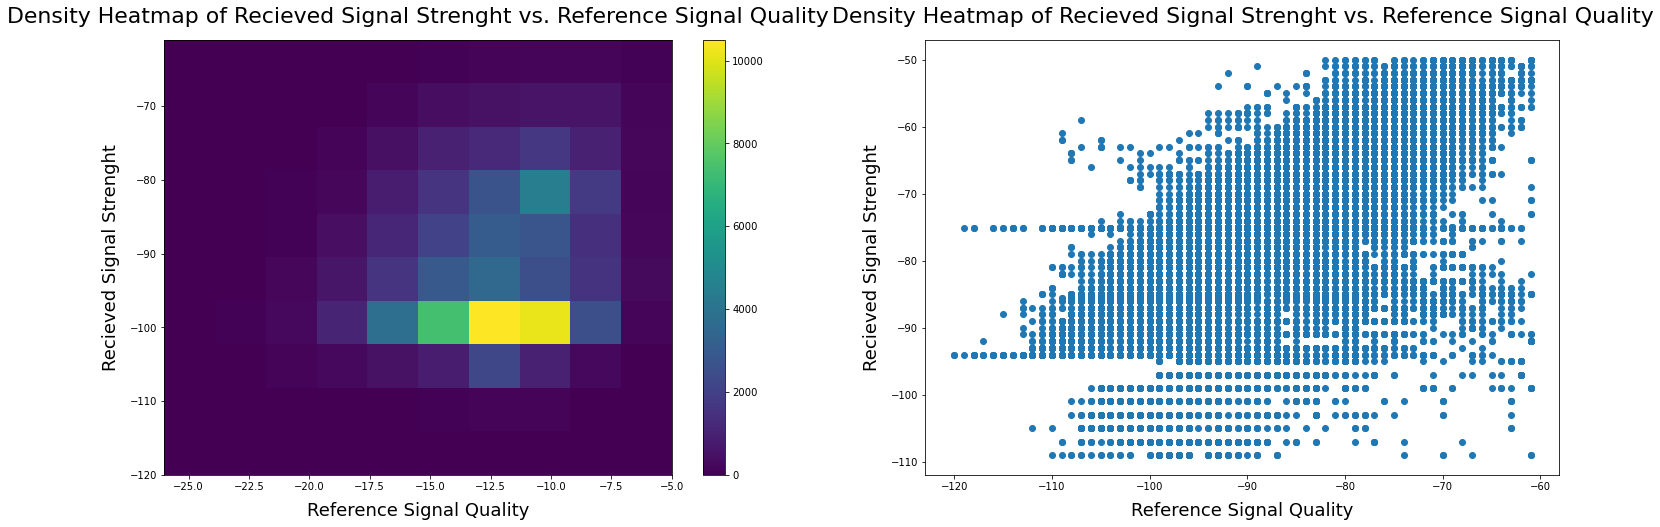

In [32]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_qual' , y = 'ref_sig_power')
plt.title('Density Heatmap of Recieved Signal Strenght vs. Reference Signal Quality', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('Recieved Signal Strenght', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
plt.scatter(data = all_datasets, x ='ref_sig_power' , y = 'rec_sig_strght')
plt.title('Density Heatmap of Recieved Signal Strenght vs. Reference Signal Quality', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('Recieved Signal Strenght', labelpad=10, fontsize=18)
plt.show();

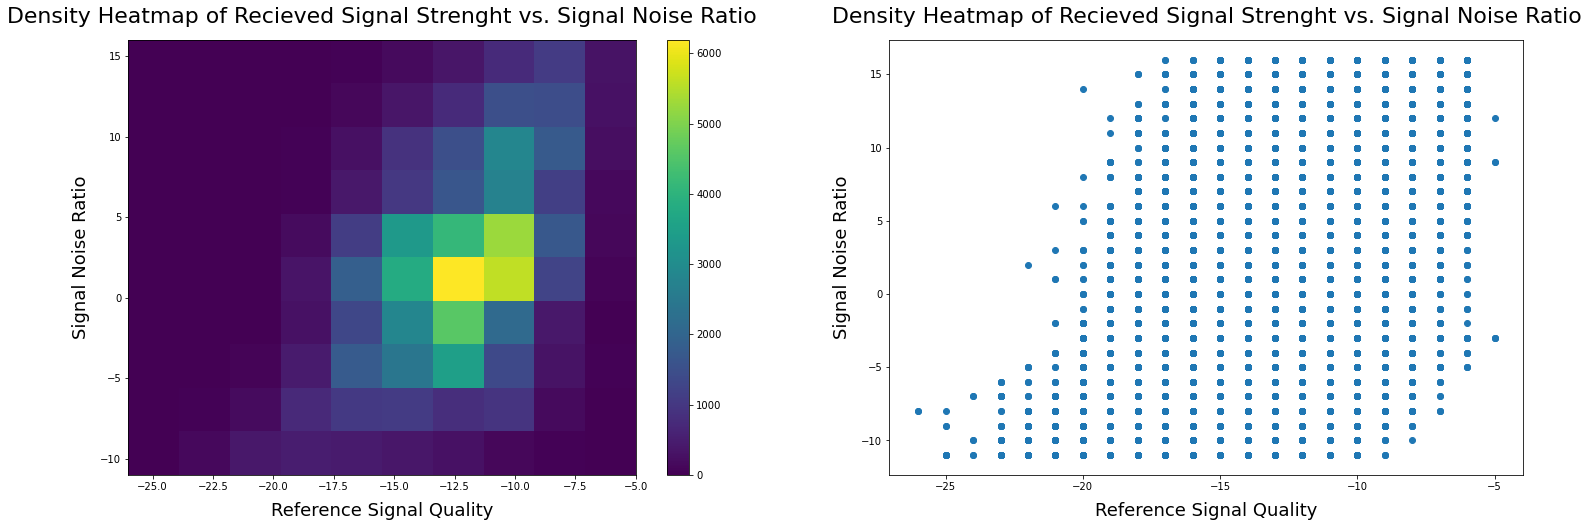

In [34]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_qual' , y = 'sig_noise_ratio')
plt.title('Density Heatmap of Referrence signal Quality vs. Signal Noise Ratio', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('Signal Noise Ratio', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
plt.scatter(data = all_datasets,x ='ref_sig_qual' , y = 'sig_noise_ratio')
plt.title('Density Heatmap of Reference Signal Quality vs. Signal Noise Ratio', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('Signal Noise Ratio', labelpad=10, fontsize=18)
plt.show();

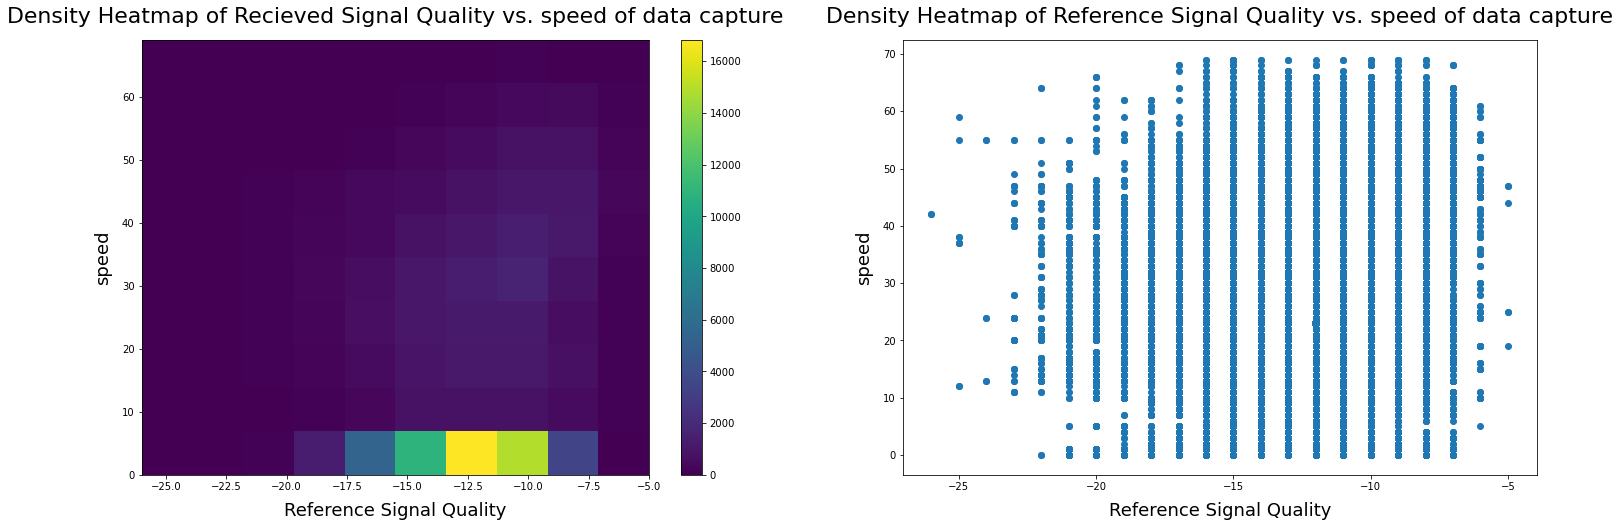

In [38]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_qual' , y = 'speed')
plt.title('Density Heatmap of Recieved Signal Quality vs. speed of data capture', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('speed', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
plt.scatter(data = all_datasets,x ='ref_sig_qual' , y = 'speed')
plt.title('Density Heatmap of Reference Signal Quality vs. speed of data capture', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('speed', labelpad=10, fontsize=18)
plt.show();

In [35]:
all_datasets.columns

Index(['speed', 'ref_sig_power', 'ref_sig_qual', 'sig_noise_ratio',
       'sig_qual_indicator', 'rec_sig_strght', 'dl_bitrate', 'ul_bitrate',
       'state', 'nodehex', 'lachex', 'nrxrsrp', 'nrxrsrq'],
      dtype='object')

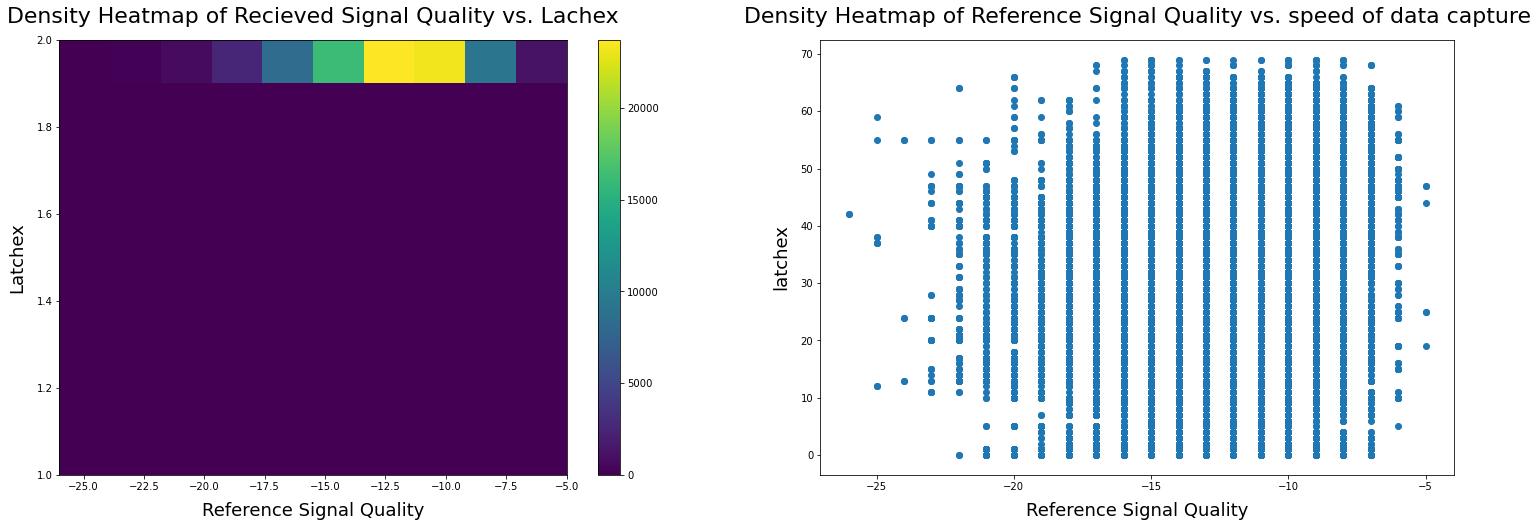

In [39]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_qual' , y = 'lachex')
plt.title('Density Heatmap of Recieved Signal Quality vs. Lachex', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('Latchex', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
plt.scatter(data = all_datasets,x ='ref_sig_qual' , y = 'speed')
plt.title('Density Heatmap of Reference Signal Quality vs. speed of data capture', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('latchex', labelpad=10, fontsize=18)
plt.show();

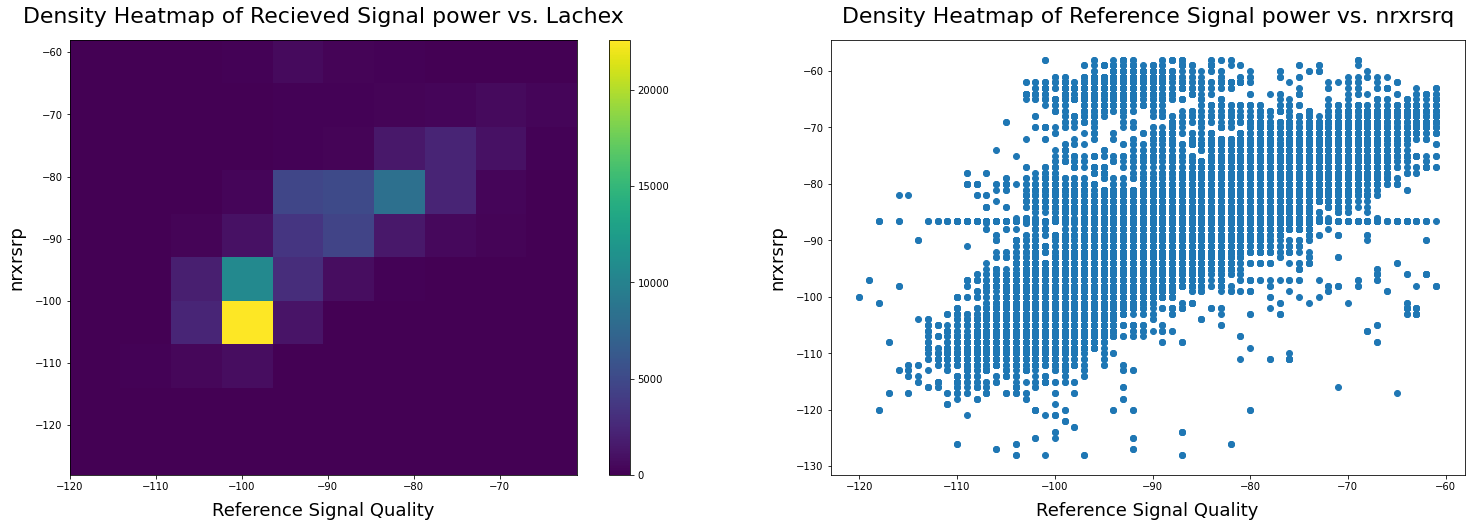

In [45]:
# Set the figure size
plt.figure(figsize = [25, 8])

# This code is only to supress a warning about a deprecated function
plt.rcParams['axes.grid'] = False

# Density heatmap map of attack vs defense
plt.subplot(1, 2, 1)

plt.hist2d(data = all_datasets, x ='ref_sig_power' , y = 'nrxrsrp')
plt.title('Density Heatmap of Recieved Signal power vs. Lachex', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('nrxrsrp', labelpad=10, fontsize=18)
plt.colorbar()

# Scatter plot for attack vs defense
plt.subplot(1, 2, 2)
plt.scatter(data = all_datasets,x ='ref_sig_power' , y = 'nrxrsrp')
plt.title('Density Heatmap of Reference Signal power vs. nrxrsrq', fontsize=22, y=1.025)
plt.xlabel('Reference Signal Quality', labelpad=10, fontsize=18)
plt.ylabel('nrxrsrp', labelpad=10, fontsize=18)
plt.show();

>Strong relationship between nrxrsp and Reference signal quality